# Enjoy  BabyEnv

See observation data, action space and all stuff contained in BabyEnv

In [1]:
import gym
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import baby.envs
from baby.envs.baby_env import default_conf

In [2]:
# Create env
env = gym.make('baby-v0')

In [3]:
# Check observation space
env.observation_space

Box(9, 21, 21)

In [4]:
# Check action space
env.action_space

Discrete(189)

In [5]:
# See full configuration
print(json.dumps(env.conf, indent=4))

{
    "seed": 0,
    "n_frame": 20,
    "n-xaxis": 21,
    "n-yaxis": 9,
    "max_episode_iteration": 1000,
    "alpha_ground_truth": 0.8,
    "validation_threshold": 0.8,
    "sigma_prediction": 1.0,
    "reward": {
        "timestep": 0,
        "validation": 1
    }
}


### Ground-truth
Ground truth are matrix generated with numpy random and filter gaussian 
in oder to have geographical consistency between frames

In [6]:
# Take first n frames
n=10

env.reset()
first_frame_truth = env.ground_truth[:, :, :n]
first_frame_truth = np.swapaxes(first_frame_truth, axis1=-1, axis2=0)

Frame #0 | shape=(21, 9)


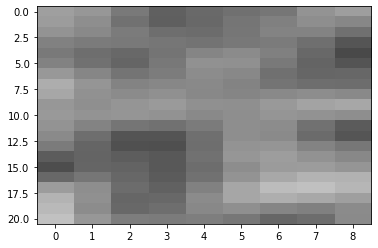

Frame #1 | shape=(21, 9)


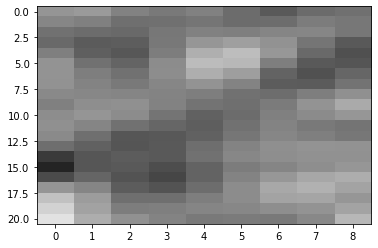

Frame #2 | shape=(21, 9)


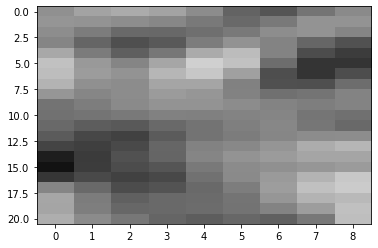

Frame #3 | shape=(21, 9)


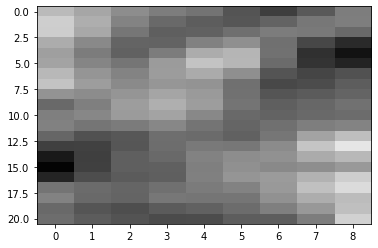

Frame #4 | shape=(21, 9)


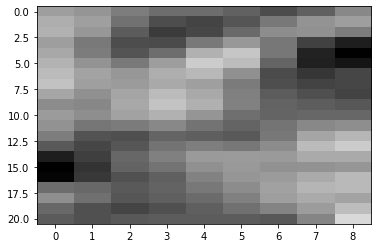

Frame #5 | shape=(21, 9)


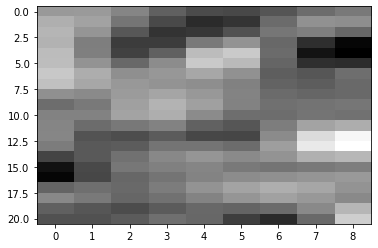

Frame #6 | shape=(21, 9)


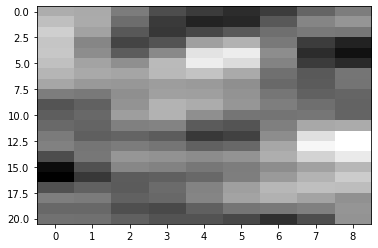

Frame #7 | shape=(21, 9)


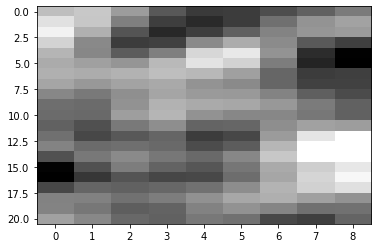

Frame #8 | shape=(21, 9)


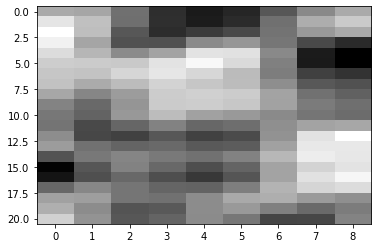

Frame #9 | shape=(21, 9)


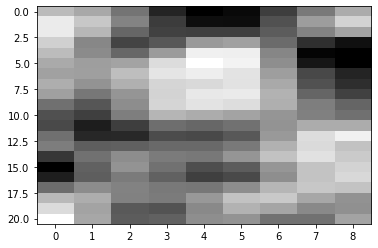

In [7]:
for num, frame in enumerate(first_frame_truth):
    print(f"Frame #{num} | shape={frame.shape}")
    
    # For visual representation flip vertical axis
    frame_repr = np.flip(frame, axis=0)
    
    # Show into notebook in grayscale
    plt.imshow(frame, cmap='gray', vmin=0.0, vmax=1.0, interpolation='nearest', aspect='auto')
    plt.show()

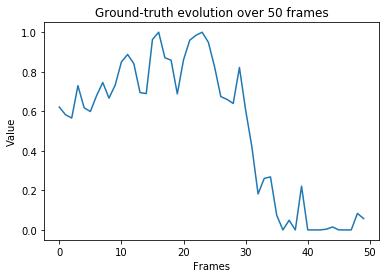

In [8]:
# Visual evolution of a single point (0, 0) over n frames
n=50
truth_evo = env.ground_truth[0, 0, :n]
plt.plot(truth_evo)
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.show()

In [9]:
# Overall statistics over frames
print(f"Mean ground truth: {np.mean(env.ground_truth)}")
print(f"Std deviation ground truth: {np.std(env.ground_truth)}")

Mean ground truth: 0.5163241333509733
Std deviation ground truth: 0.30487247723217065


## Impact of alpha_ground_truth on ground truth evolution
Modifying conf to see different options

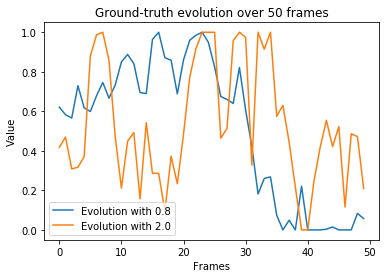

In [10]:
stored_ground_truth_prev_value = np.copy(env.ground_truth[0, 0, :n])
origin_alpha = env.conf['alpha_ground_truth']
env.conf['alpha_ground_truth'] = 2.0

# Reset ground truth
env.reset()

plt.plot(stored_ground_truth_prev_value, label=f"Evolution with {origin_alpha}")
plt.plot(env.ground_truth[0, 0, :n], label=f"Evolution with {env.conf['alpha_ground_truth']}")
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.legend()
plt.show()

In [11]:
# Restore old value
env.conf['alpha_ground_truth'] = origin_alpha

## Forecast compared to ground-truth

In [12]:
def show_prediction_ground_truth():
    obs = env.reset()
    print(f"Show pred/truth with sigma={env.conf['sigma_prediction']}")

    plt.figure(figsize=obs.shape[:2])
    columns = 2

    t = 0
    i_plt = 0

    for i in range(env.conf['n_frame']):
        
        error = obs[:, :, i] - env.ground_truth[:, :, t]
        print(f"Frame {i} // Mean error = {np.mean(error)} // std = {np.std(error)}")
        
        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(obs[:,:,i], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1

        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(env.ground_truth[:,:,t], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1

        t += i    

Show pred/truth with sigma=1.0
Frame 0 // Mean error = -0.0043896902009243925 // std = 0.07397017432520546
Frame 1 // Mean error = 0.0072615546294398795 // std = 0.09518216552655391
Frame 2 // Mean error = 0.018691845964637382 // std = 0.11841014557561562
Frame 3 // Mean error = -0.009293024209139907 // std = 0.10080263314237188
Frame 4 // Mean error = -0.010246527265542385 // std = 0.14161402949847365
Frame 5 // Mean error = -0.018449577554599344 // std = 0.2048276442999846
Frame 6 // Mean error = 0.004549661648496823 // std = 0.20443390066465658
Frame 7 // Mean error = 0.016669260384293217 // std = 0.2725010307733479
Frame 8 // Mean error = -0.029595962245316867 // std = 0.2825041939800832
Frame 9 // Mean error = -0.002443823121907451 // std = 0.33355512001627774
Frame 10 // Mean error = -0.02107580685984443 // std = 0.3606155123848536
Frame 11 // Mean error = 0.043100572930456334 // std = 0.3215184704762217
Frame 12 // Mean error = 0.09059080359317838 // std = 0.3407498338370878
Fra

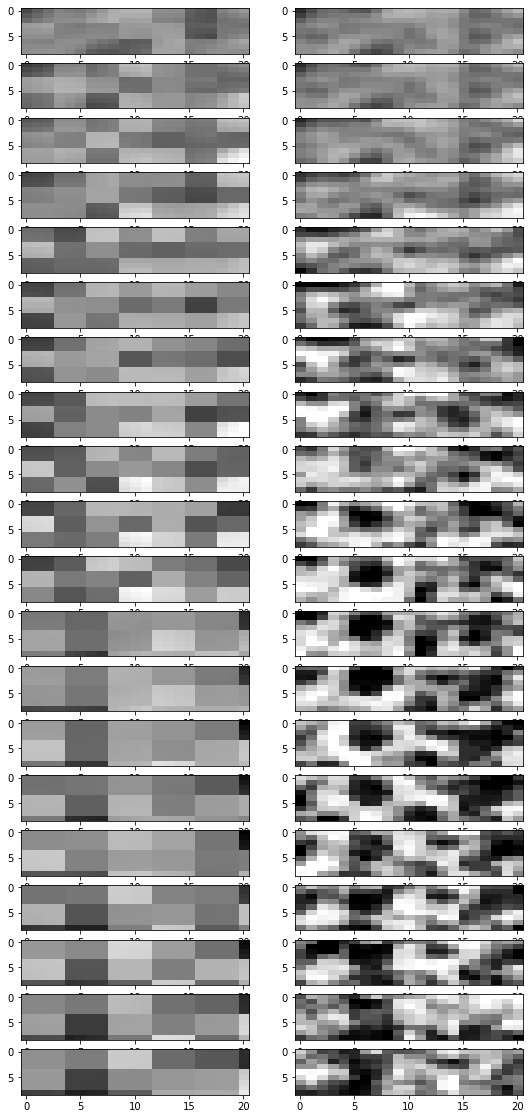

In [13]:
# Show with initial configuration
show_prediction_ground_truth()

Show pred/truth with sigma=0.5
Frame 0 // Mean error = 0.015835911894634735 // std = 0.07496290540199765
Frame 1 // Mean error = -0.010349048487363241 // std = 0.11798261703870999
Frame 2 // Mean error = 0.003404959580731102 // std = 0.09760143351503954
Frame 3 // Mean error = -0.015688874446061825 // std = 0.11466533288136016
Frame 4 // Mean error = 0.03798104911701921 // std = 0.15580155672234575
Frame 5 // Mean error = 0.028804386280019675 // std = 0.17818713764735078
Frame 6 // Mean error = 0.03088200551171002 // std = 0.2360083199617617
Frame 7 // Mean error = 0.03397520776979709 // std = 0.2977989323293281
Frame 8 // Mean error = -0.00172021044125497 // std = 0.34153318265437604
Frame 9 // Mean error = -0.07980971056036046 // std = 0.3135654441153455
Frame 10 // Mean error = -0.05095777358957541 // std = 0.3040616091997752
Frame 11 // Mean error = -0.08574449028468478 // std = 0.3350594571266563
Frame 12 // Mean error = -0.015823926336176776 // std = 0.350399873546261
Frame 13 //

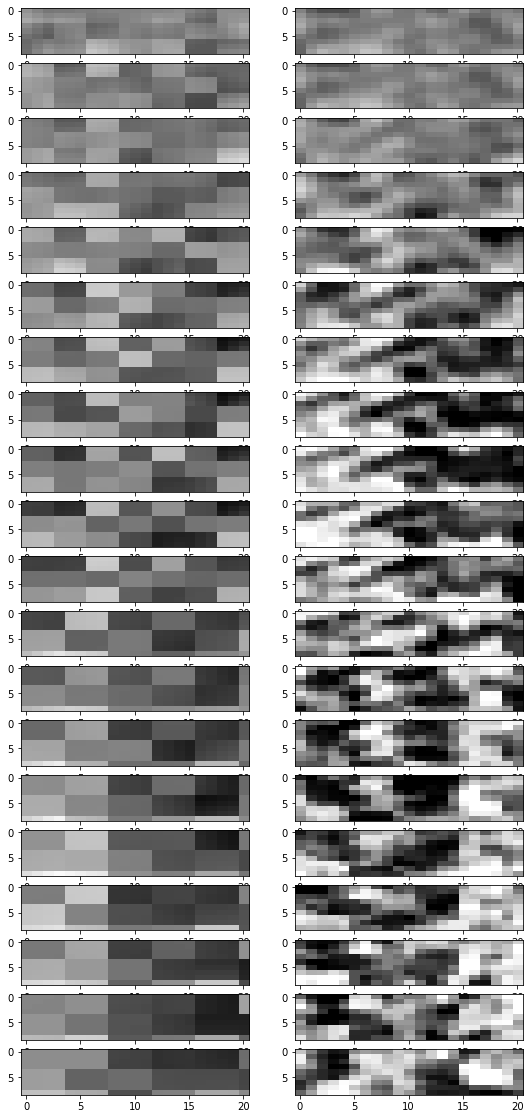

In [14]:
original_sigma=env.conf['sigma_prediction']

env.conf['sigma_prediction']=0.5
show_prediction_ground_truth()
env.conf['sigma_prediction']=original_sigma